# Portfolio Analysis - Justin Do & Defne Sener 

---

### **Primary Objective**: complete all the steps below and return the risk analysis of your seven (7) stock portfolio against the S&P500 (SPY), Russell 2000 (IWM), and the Dow Jones Industrial Average (DIA).

---

## Importing our packages & storing our tickers

In [31]:
import pandas as pd 
import yfinance as yf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math 

In [2]:
tickers = ['AAPL', 'AMZN', 'CRM', 'F', 'INTC', 'PFE', 'SONY' ] # Apple, Amazon, Salesforce Inc, Ford, Intel Corp, Pfizer Inc, Sony
etfs = ['SPY', 'IWM', 'DIA'] # S&P500, Russell 2000, Dow Jones Industrial Average 

In [3]:
## Function for combined_data?
def combined_data(period='1y', specific_data='Adj Close'):   # default period value; default specific_data 
    return yf.download(tickers+etfs, period=period)[specific_data] # Adj Close for accurate measures 

## Requirement 1: Column 1 - Ticker

In [4]:
# Set the tickers as our index 
req1 = pd.DataFrame(index=tickers)
req1

""
AAPL
AMZN
CRM
F
INTC
PFE
SONY


## Requirement 1: Column 2 - Portfolio Weight

- Equal weight => percentage is based on the price 
- Assuming we have one stock of each:
    - we need to find the total the divide each stock price by the total

In [5]:
# Finding the recent price 
recent_prices = combined_data('3mo')[tickers].iloc[-1]
total_price = recent_prices.sum()

weight_list = []
for price in recent_prices:
    weight = (price/total_price) * 100
    weight_list.append(round(weight,2))
    
req1['Portfolio Weight'] = weight_list
req1

[*********************100%***********************]  10 of 10 completed


,Portfolio Weight
AAPL,26.03
AMZN,16.64
CRM,28.89
F,2.13
INTC,4.40
PFE,7.16
SONY,14.76


## Requirement 1: Column 3: Annualized Volatility

- Using trailing 3 months

In [6]:
# for annualized vol, we need to look at the percent change 
per_change = combined_data('3mo')[tickers].pct_change()
# removing the inital NaN row 
per_change = per_change.drop(per_change.index[0])

[*********************100%***********************]  10 of 10 completed


### Looking at : [Calculating Annualized Volatility](https://www.fool.com/knowledge-center/how-to-calculate-annualized-volatility.aspx)

- We need the:
    - Daily Volatility => Standard Deivation of the Pct Change in three months 
    - Trading Days => The rows in our three month period 

In [7]:
# daily voli is the stdev of the pct_change of the three mon period (https://www.fool.com/knowledge-center/how-to-calculate-annualized-volatility.aspx)
daily_voli = per_change.std()

# trading days would be the amount of data we have in 3 months so...
trading_days = float(per_change.count()['AAPL'])

ann_voli_list = []
for voli in daily_voli:
    ann_voli = (float(voli) * math.sqrt(trading_days)) * 100 # changing it to a percentage 
    ann_voli_list.append(round(ann_voli,2))

req1['Annualized Volatility'] = ann_voli_list
req1

,Portfolio Weight,Annualized Volatility
AAPL,26.03,13.50
AMZN,16.64,19.93
CRM,28.89,16.93
F,2.13,20.36
INTC,4.40,16.96
PFE,7.16,11.23
SONY,14.76,12.09


## Requirement 1: Column 4 - Beta Against SPY

- Using Trailing 12-Months  

In [8]:
# With different periods, we're going to use our function 
_12_month_data = combined_data('12mo').pct_change() # we'll be looking at the pencent change so..
_12_month_data = _12_month_data.drop(_12_month_data.index[0])

[*********************100%***********************]  10 of 10 completed


### Looking at [Calculating Beta](https://www.investopedia.com/ask/answers/070615/what-formula-calculating-beta.asp)

`
Beta = (Covarance of stock & etf/ Variance of etf)
`

In [9]:
betas_against_spy = []
for ticker in tickers:
    etf = "SPY"
    ticker_spy_cov = _12_month_data[[ticker, etf]].cov()[etf][ticker] # returns a matrix so we need the val of etf & ticker
    spy_variance = _12_month_data[etf].var()
    
    ticker_spy_beta = ticker_spy_cov / spy_variance 
    betas_against_spy.append(round(ticker_spy_beta,2))

req1['Beta Against SPY'] = betas_against_spy
req1

,Portfolio Weight,Annualized Volatility,Beta Against SPY
AAPL,26.03,13.50,1.31
AMZN,16.64,19.93,1.65
CRM,28.89,16.93,1.44
F,2.13,20.36,1.45
INTC,4.40,16.96,1.26
PFE,7.16,11.23,0.52
SONY,14.76,12.09,0.92


## Requirement 1: Column 5 - Beta Against IWM

-  Using Trailing 12-Months  

In [10]:
# We could still reuse trailing 12 month data 
betas_against_iwm = []
for ticker in tickers:
    etf = 'IWM'
    ticker_iwm_cov = _12_month_data[[ticker, etf]].cov()[etf][ticker] # returns a matrix so we need the val of etf & ticker
    iwm_variance = _12_month_data[etf].var()
    
    ticker_iwm_beta = ticker_iwm_cov / iwm_variance 
    betas_against_iwm.append(round(ticker_iwm_beta,2))
    
req1['Beta Against IWM'] = betas_against_iwm
req1

,Portfolio Weight,Annualized Volatility,Beta Against SPY,Beta Against IWM
AAPL,26.03,13.50,1.31,1.04
AMZN,16.64,19.93,1.65,1.36
CRM,28.89,16.93,1.44,1.23
F,2.13,20.36,1.45,1.32
INTC,4.40,16.96,1.26,1.06
PFE,7.16,11.23,0.52,0.37
SONY,14.76,12.09,0.92,0.81


## Requirement 1: Column 6 - Beta against DIA 
- Using trailing 12-Months

In [11]:
# We could still reuse trailing 12 month data 
betas_against_dia = []
for ticker in tickers:
    etf = 'DIA'
    ticker_dia_cov = _12_month_data[[ticker, etf]].cov()[etf][ticker] # returns a matrix so we need the val of etf & ticker
    dia_variance = _12_month_data[etf].var()
    
    ticker_dia_beta = ticker_dia_cov / dia_variance 
    betas_against_dia.append(round(ticker_dia_beta,2))
    
req1['Beta Against DIA'] = betas_against_dia
req1

,Portfolio Weight,Annualized Volatility,Beta Against SPY,Beta Against IWM,Beta Against DIA
AAPL,26.03,13.50,1.31,1.04,1.48
AMZN,16.64,19.93,1.65,1.36,1.77
CRM,28.89,16.93,1.44,1.23,1.61
F,2.13,20.36,1.45,1.32,1.68
INTC,4.40,16.96,1.26,1.06,1.47
PFE,7.16,11.23,0.52,0.37,0.71
SONY,14.76,12.09,0.92,0.81,1.03


## Requirement 1: Column 7 - Average Weekly Drawdown

In [12]:
# Using 52wk worth of data we could look at Highs and Lows 
_52_week_data_highs = combined_data('52wk', 'High')[tickers].pct_change()
_52_week_data_lows = combined_data('52wk', 'Low')[tickers].pct_change()

avg_weekly_drawdown_list = []
for ticker in tickers:
    avg_highs = _52_week_data_highs[ticker].mean()
    avg_lows = _52_week_data_lows[ticker].mean()
    
    avg_weekly_drawdown = ((avg_lows - avg_highs) / avg_highs) * 100
    avg_weekly_drawdown_list.append(round(avg_weekly_drawdown, 2))

req1['Average Weekly Drawdown'] = avg_weekly_drawdown_list
req1    

[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  10 of 10 completed


,Portfolio Weight,Annualized Volatility,Beta Against SPY,Beta Against IWM,Beta Against DIA,Average Weekly Drawdown
AAPL,26.03,13.50,1.31,1.04,1.48,-15.75
AMZN,16.64,19.93,1.65,1.36,1.77,-4.77
CRM,28.89,16.93,1.44,1.23,1.61,-28.46
F,2.13,20.36,1.45,1.32,1.68,-15.38
INTC,4.40,16.96,1.26,1.06,1.47,-2.84
PFE,7.16,11.23,0.52,0.37,0.71,-20.80
SONY,14.76,12.09,0.92,0.81,1.03,0.15


## Requirement 1: Column 8 - Maximum Weekly Drawdown

In [13]:
# Using the same data as the recent requirement & repeat the same steps but this time we're looking at max in Highs and min is Lows
max_weekly_drawdown_list = []
for ticker in tickers:
    max_highs = _52_week_data_highs[ticker].max()
    min_lows = _52_week_data_lows[ticker].min()
    
    max_weekly_drawdown = ((min_lows - max_highs) / max_highs) * 100
    max_weekly_drawdown_list.append(round(max_weekly_drawdown, 2))

req1['Maximum Weekly Drawdown'] = max_weekly_drawdown_list
req1

,Portfolio Weight,Annualized Volatility,Beta Against SPY,Beta Against IWM,Beta Against DIA,Average Weekly Drawdown,Maximum Weekly Drawdown
AAPL,26.03,13.50,1.31,1.04,1.48,-15.75,-180.06
AMZN,16.64,19.93,1.65,1.36,1.77,-4.77,-210.40
CRM,28.89,16.93,1.44,1.23,1.61,-28.46,-167.67
F,2.13,20.36,1.45,1.32,1.68,-15.38,-249.69
INTC,4.40,16.96,1.26,1.06,1.47,-2.84,-264.75
PFE,7.16,11.23,0.52,0.37,0.71,-20.80,-200.90
SONY,14.76,12.09,0.92,0.81,1.03,0.15,-153.86


## Requirement 1: Column 9 - Total Return 
- Using trailing 10-Years

In [14]:
# Let's get the 10 year data 
_10_year_data = combined_data('10y')[tickers]

[*********************100%***********************]  10 of 10 completed


## Looking at [Total Return](https://www.investopedia.com/terms/t/totalreturn.asp)

We could get the current value and subtract that with the initial value 

In [15]:
total_return_list = []
for ticker in tickers:
    curr_val = _10_year_data[ticker].iloc[-1]
    init_val = _10_year_data[ticker].iloc[0]
    
    val_diff = curr_val - init_val 
    total_return = (val_diff / init_val) * 100
    total_return_list.append(round(total_return,2))

req1['Total Return'] = total_return_list
req1

,Portfolio Weight,Annualized Volatility,Beta Against SPY,Beta Against IWM,Beta Against DIA,Average Weekly Drawdown,Maximum Weekly Drawdown,Total Return
AAPL,26.03,13.50,1.31,1.04,1.48,-15.75,-180.06,1010.17
AMZN,16.64,19.93,1.65,1.36,1.77,-4.77,-210.40,609.19
CRM,28.89,16.93,1.44,1.23,1.61,-28.46,-167.67,259.58
F,2.13,20.36,1.45,1.32,1.68,-15.38,-249.69,51.81
INTC,4.40,16.96,1.26,1.06,1.47,-2.84,-264.75,60.07
PFE,7.16,11.23,0.52,0.37,0.71,-20.80,-200.90,123.40
SONY,14.76,12.09,0.92,0.81,1.03,0.15,-153.86,448.79


## Requirement 1: Column 10 - Annualized Total Return 
- Using trailing 10-Years 

In [16]:
# to calculate annualized return, we just need total_return which is already in our dataframe 
annualized_return_list = []
for ticker in tickers:
    annualized_return = ((1 + req1['Total Return'][ticker])**(1/10))-1
    annualized_return_list.append(round((annualized_return * 100),2))

req1['Annualized Return'] = annualized_return_list
req1

,Portfolio Weight,Annualized Volatility,Beta Against SPY,Beta Against IWM,Beta Against DIA,Average Weekly Drawdown,Maximum Weekly Drawdown,Total Return,Annualized Return
AAPL,26.03,13.50,1.31,1.04,1.48,-15.75,-180.06,1010.17,99.75
AMZN,16.64,19.93,1.65,1.36,1.77,-4.77,-210.40,609.19,89.91
CRM,28.89,16.93,1.44,1.23,1.61,-28.46,-167.67,259.58,74.42
F,2.13,20.36,1.45,1.32,1.68,-15.38,-249.69,51.81,48.69
INTC,4.40,16.96,1.26,1.06,1.47,-2.84,-264.75,60.07,50.86
PFE,7.16,11.23,0.52,0.37,0.71,-20.80,-200.90,123.40,61.99
SONY,14.76,12.09,0.92,0.81,1.03,0.15,-153.86,448.79,84.20


## Requirement 2: Column 1 - ETF Ticker 

In [17]:
# Using etfs as index
req2 = pd.DataFrame(index=etfs)
req2

""
SPY
IWM
DIA


## Requirement 2: Column 2 - Correlation Against ETF

In [18]:
# getting tickers and etfs 10 year data 
_10_year_data = combined_data('10y').pct_change()
_10_year_data = _10_year_data.drop(_10_year_data.index[0])

corr_against_etf_list = []
for etf in etfs:
    _10_year_data['total_pct_change_tickers'] = _10_year_data[tickers + [etf]].sum(axis=1) # adding across
    corr_against_etf = _10_year_data[etf].corr(_10_year_data['total_pct_change_tickers'])
    corr_against_etf_list.append(round(corr_against_etf,2))

req2['Correlation against ETF'] = corr_against_etf_list
req2

[*********************100%***********************]  10 of 10 completed


,Correlation against ETF
SPY,0.92
IWM,0.84
DIA,0.87


## Requirement 2: Column 3 - Covariance of Portfolio against ETF

In [21]:
# Using the same data from Column 2 (10year)
cov_against_etf_list = []
for etf in etfs:
    _10_year_data['total_pct_change_tickers'] = _10_year_data[tickers + [etf]].sum(axis=1) # adding across
    cov_against_etf = _10_year_data[[etf, 'total_pct_change_tickers']].cov()
    cov_against_etf_list.append(round(cov_against_etf[etf]['total_pct_change_tickers']*100,2))

req2['Covariance against ETF'] = cov_against_etf_list
req2

,Correlation against ETF,Covariance against ETF
SPY,0.92,0.10
IWM,0.84,0.12
DIA,0.87,0.10


## Requirement 2: Column 4 - Tracking Errors
- Using trailing 10-years 
- Following a [Python For Risk](https://www.youtube.com/watch?v=n5TqRGu62vQ&ab_channel=PythonforRisk%2CDataandPerformance) video
    - `Standard Dev (Portfolio Percent Change - ETF Percent Change) x Sqrt(Trading Days) `

In [22]:
 # Since it's also 10 years we can use _10_year_data 

tracking_errors = []
for etf in etfs:
    _10_year_data['total_pct_change_tickers'] = _10_year_data[tickers + [etf]].sum(axis=1)
    _10_year_data = _10_year_data.drop(_10_year_data.index[0])
    _10_year_data['TE'] = _10_year_data['total_pct_change_tickers'] - _10_year_data[etf]
    
    trading_days = _10_year_data.count()['AAPL']
    te = (_10_year_data['TE'].std() * 100) * math.sqrt(trading_days)
    tracking_errors.append(round(te,2))
    
req2['Tracking Errors'] = tracking_errors
req2

,Correlation against ETF,Covariance against ETF,Tracking Errors
SPY,0.92,0.10,464.31
IWM,0.84,0.12,464.27
DIA,0.87,0.10,464.27


## Requirement 2: Column 5 - Sharpe Ratio 
- Using Current Risk-Free Rate
- Followed [Calculating Sharpe Ratio](# https://towardsdatascience.com/calculating-sharpe-ratio-with-python-755dcb346805)
    - `Sharpe Ratio = Mean of Daily Returns / Standard Dev of Daily Returns`

In [23]:
# Using 1 year worth of data 
_1_year_data = combined_data('1y').pct_change()
_1_year_data = _1_year_data.drop(_1_year_data.index[0])
risk_free_rate = 0 # common to assume risk free rate is 0 

sharpe_ratios = []
for etf in etfs:
    _1_year_data['total_pct_change_tickers'] = _1_year_data[tickers + [etf]].sum(axis=1)
    daily_return_mean = _1_year_data['total_pct_change_tickers'].mean()
    daily_return_stdev = _1_year_data['total_pct_change_tickers'].std()
    
    sharpe_ratio = (daily_return_mean / daily_return_stdev) * 100
    sharpe_ratios.append(round(sharpe_ratio,2))

req2['Sharpe Ratio'] = sharpe_ratios
req2

[*********************100%***********************]  10 of 10 completed


,Correlation against ETF,Covariance against ETF,Tracking Errors,Sharpe Ratio
SPY,0.92,0.10,464.31,-3.77
IWM,0.84,0.12,464.27,-3.66
DIA,0.87,0.10,464.27,-3.71


## Requirement 2: Column 6 - Annualized Volatility 
- Using 1 Year Data 
- `Portfolio Volatility - ETF Volatility`

In [24]:
# We can use the same data from Column 5 
ann_vol_spreads = []
for etf in etfs:
    # port voli
    _1_year_data['total_pct_change'] = _1_year_data[tickers].sum(axis=1)
    ann_port_daily_voli = (_1_year_data['total_pct_change'].std()) * math.sqrt(252)


    # etf voli 
    _1_year_data['total_pct_change'] = _1_year_data[etf]
    ann_etf_daily_voli = (_1_year_data['total_pct_change'].std()) * math.sqrt(252)

    ann_vol_spreads.append(round((ann_port_daily_voli - ann_etf_daily_voli) * 100,2))
    
req2['Annualized Volatility Spread'] = ann_vol_spreads
req2 

,Correlation against ETF,Covariance against ETF,Tracking Errors,Sharpe Ratio,Annualized Volatility Spread
SPY,0.92,0.10,464.31,-3.77,189.40
IWM,0.84,0.12,464.27,-3.66,186.01
DIA,0.87,0.10,464.27,-3.71,193.68


## Requirement 3 - Correlation Matrix showing correlation between the equal-weighted portfolio, 3 ETFs, and your 7 stocks

In [26]:
# We need to look at the percent change over 10 year data
_10_year_data_combined = combined_data('10y').pct_change()
_10_year_data_combined = _10_year_data_combined.drop(_10_year_data_combined.index[0])

[*********************100%***********************]  10 of 10 completed


In [33]:
# Now we need to see the correlation between our tickers and etfs => which will yield a matrix correlation 
matrix = _10_year_data_combined.corr()    # assuming the equal-weighted_portfolio is the 7 stocks
matrix

,AAPL,AMZN,CRM,DIA,F,INTC,IWM,PFE,SONY,SPY
AAPL,1.000000,0.522674,0.491173,0.656853,0.362470,0.520634,0.582328,0.306602,0.412403,0.721145
AMZN,0.522674,1.000000,0.530811,0.507872,0.297085,0.407314,0.499285,0.236454,0.355587,0.614462
CRM,0.491173,0.530811,1.000000,0.562445,0.314972,0.420106,0.569791,0.251512,0.382258,0.636932
DIA,0.656853,0.507872,0.562445,1.000000,0.611055,0.644627,0.853188,0.526630,0.504636,0.962571
F,0.362470,0.297085,0.314972,0.611055,1.000000,0.376653,0.647002,0.247200,0.361027,0.609165
INTC,0.520634,0.407314,0.420106,0.644627,0.376653,1.000000,0.585573,0.336366,0.381341,0.674398
IWM,0.582328,0.499285,0.569791,0.853188,0.647002,0.585573,1.000000,0.404230,0.493381,0.883037
PFE,0.306602,0.236454,0.251512,0.526630,0.247200,0.336366,0.404230,1.000000,0.271716,0.523001
SONY,0.412403,0.355587,0.382258,0.504636,0.361027,0.381341,0.493381,0.271716,1.000000,0.544359
SPY,0.721145,0.614462,0.636932,0.962571,0.609165,0.674398,0.883037,0.523001,0.544359,1.000000


<AxesSubplot:>

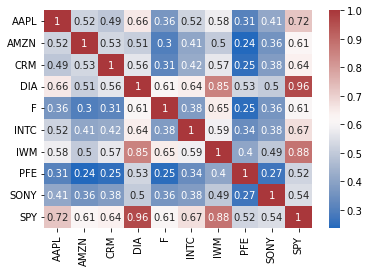

In [36]:
# Ploting our matrix 
sns.heatmap(matrix, annot=True, cmap='vlag')